# Dendrite Model

1. Create a passive cable model using th eneural parameters described in the McIntyre, Richardson, and Grill Paper provided in the reading. Your model shall consist of three dendrites connected to a cell body. The cell body is assumed to be a sphere with diameter 50 $\mu$m, the dendrites are cylinders with the following diameters and lengths

  D1: 
    
    * L=1mm
    * d = 10 $\mu$m
    
  D2: 
    
    * L = 1mm
    * d = 20 $\mu$m
    
  D3:
    
    * L=300 $\mu$m
    * d = 20 $\mu$m
    
  Show the change in potential at the cell body as a function of an injected square pulse of cathodal (depolarizing) current under the conditions listed below. After all of these modeling exercises, describe the influence of the diameter and length of the dendrites on processing of synaptic information.
    
   * Same, single pulse input in the middle of each of the respective dendrites.
   * Same, single pulse input equidistant from the cell body for each dendrite.
   * Multiple input pulses of current at equidistance from the cell body for eachdendrite for several frequencies.
    
2. Add an active axon to your model. Double the sodium channel density in the initial axon hillock segment of the axon. Repeat the scenarios above and describe the effects on the axon. Find input pulses that drive the axon to fire an action potential. The axon should be 20 $\mu$m in diameter, is myelinated, and should consist of 20 nodes after the initial segment.
        
3. Rather than injecting a current internally at the node of the dendrite, add a synaptic current across the membrane. Use a single tau model and set tau to different values ranging from 50 $\mu$s and th emaximum synaptic conductance initially equal tot he sodium conductance and then varied higher and lower. Explore spatial and temporal summation using your model. Vary the frequency of input pulses that are individually too small to cause axon excitement.

4. Change the diameters of the cell body from 30 $\mu$m to 100 $\mu$m with active axons changing in proportion from 8 $\mu$m to 20 $\mu$m. Describe the impact of the size change on the dendritic input and on the axon excitation. For a fixed size, examine the effect of increasing intermodal spacing from 100*D to 500*D on action potential propagation.

## Math

### Nernst potential

The nernst potential is governed by the equation:

$$V_{ion} = \frac{RT}{zF} \ln \left( \frac{[ion]_{out}}{[ion]_{in}} \right)$$

Where

$$V_{ion} = V_{in} - V_{out}$$

$R$ is the gas constant 8.314 J/K/Mol

$T$ is temperature in kelvin

$z$ is the valence of the ion

$F$ is Faradays constant 96,485 C/mol

Given $T$ is 37 C, then 

$$V_{ion} = \frac{26.7}{z} \ln \left( \frac{[ion]_{out}}{[ion]_{in}} \right)$$
$$V_{ion} = \frac{61.5}{z} \log \left( \frac{[ion]_{out}}{[ion]_{in}} \right)$$

### GHK equation

When multiple ions are involved, the following relation occurs:

$$V_{GHK} = \frac{RT}{F} \times \ln \left[ \frac{\sum_{+ions} P_{ion} [ion^+]_{out} + \sum_{-ions} P_{ion} [ion^-]_{in}}{\sum_{+ions}P_{ion}[ion^+]_{in} + \sum_{-ions} P_{ion}[ion^-]_{out}}\right]$$

where $P_{ion}$ is the membrane permiability of that particular ion.

### Passive Cable equation

The passive cable equation is derived by assuming the dendrite is a cylinder. It assumes that all the ion channels on the membrane can be represented by a single resistor. $\Delta x$ from the integration actually gets factored out and becomes a partial derivative term for the external voltage.


$$V_m + \tau_m \frac{\partial V_m}{\partial t} - \lambda^2 \frac{\partial^2 V_m}{\partial x^2} - i_{inj} = \lambda^2 \frac{\partial^2 V_e}{\partial x^2}$$

$$\tau_m = r_m c_m$$
$$\lambda = \frac{r_m}{r_a}$$

So what does the cable equation represent?

It represents the relationship between the membrane voltage, the external voltage, and any injected voltage.

If the equation is normally derived, the $i_{inj}$ term is actually $\frac{i_{inj} r_m}{\Delta x}$, but you can ignore the $\Delta x$ term if you assume the current is injected from a point, and $r_m$ can be ignored if you assume that it is injected directly inside.

So for the model, what are the inputs, and what are the outputs?

The input is $i_{inj}$ and the outputs are actually $i_a+$ and $i_a-$ using these and superposition, we'll be able to chain them to other nodes.

## Conversion to code:

The compartment model discretizes the continuous cable model by discrete steps for a compartment $j$, and assuming that the external voltage, $V_e$ is zero, we get the following equation:

$$\frac{V_j}{R_m} + C_m \frac{d V_j}{d t} -  \frac{V_{j+1} - 2V_j + V_{j-1}}{r_a \Delta x^2} - i_{inj} = 0$$

Next you can generalize that the voltages of each compartment are related by different $r_a$s.

$$\frac{V_j}{R_m} + C_m \frac{d V_j}{d t} +  \frac{V_j - V_{j+1}}{0.5\cdot(R_{a,j}+R_{a,j+1})} +\frac{V_j - V_{j-1}}{0.5\cdot(R_{a,j}+R_{a,j-1})} - i_{inj} = 0$$

Where
$$R_m =\frac{r_m}{\Delta x}$$
$$C_m =c_m\Delta x$$
$$R_a =r_a\Delta x$$

You can rearrange the equation to get the following:

$$C_m \frac{d V_j}{d t} = -\left(\frac{1}{r_m \Delta x} + \frac{1}{0.5 \cdot (r_{a,j} + r_{a,j+1})} + \frac{1}{0.5 \cdot (r_{a,j} + r_{a,j-1})} \right)V_j + \left(\frac{1}{0.5\cdot(r_{a,j}+r_{a,j+1})}\right)V_{j+1}+ \left(\frac{1}{0.5\cdot(r_{a,j}+r_{a,j-1})}\right)V_{j-1} $$

Which can be rearranged into the following matrix:

$$
\begin{bmatrix}
\frac{d V_{j}}{dt} \\
\frac{d V_{j+1}}{dt} \\
\frac{d V_{j+2}}{dt} \\
\frac{d V_{j+3}}{dt} \\
\vdots
\end{bmatrix} 
= 
A\begin{bmatrix}
V_j \\
V_{j+1} \\
V_{j+2} \\
V_{j+3} \\
V_{j+4}
\end{bmatrix}
+
\begin{bmatrix}
i_{inj,j} \\
i_{inj,j+1} \\
i_{inj,j+2} \\
i_{inj,j+3} \\
i_{inj,j+4}
\end{bmatrix}
$$

$$d\overrightarrow{V} = A\overrightarrow{V} + \overrightarrow{I}$$

Where the matrix A has coefficients which represent the resistances connecting the nodes with the adjacent nodes. Assuming all voltages start from zero, we can integrate the system over time to produce the voltage output.

In [5]:
using Plots
pyplot(size = (300,300))

Plots.PyPlotBackend()

Id: 1	Parent: 0	Children: [2]
Id: 2	Parent: 1	Children: [3]
Id: 3	Parent: 2	Children: [4]
Id: 4	Parent: 3	Children: [5]
Id: 5	Parent: 4	Children: [6]
Id: 6	Parent: 5	Children: [7]
Id: 7	Parent: 6	Children: [8]
Id: 8	Parent: 7	Children: [9]
Id: 9	Parent: 8	Children: [10]
Id: 10	Parent: 9	Children: [11]
Id: 11	Parent: 10	Children: [12]
Id: 12	Parent: 11	Children: [13]
Id: 13	Parent: 12	Children: [14]
Id: 14	Parent: 13	Children: [15]
Id: 15	Parent: 14	Children: [16]
Id: 16	Parent: 15	Children: [17]
Id: 17	Parent: 16	Children: [18]
Id: 18	Parent: 17	Children: [19]
Id: 19	Parent: 18	Children: [20]
Id: 20	Parent: 19	Children: [21]
Id: 21	Parent: 20	Children: Int64[]


ImageMagick can be installed by executing `Pkg.add("ImageMagick")`
Will try ffmpeg, but it's lower quality...)


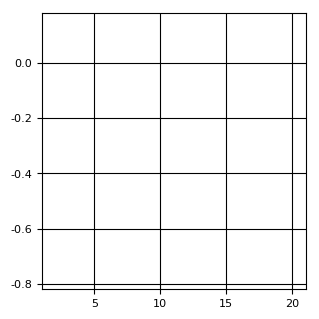

INFO: Saved animation to /media/sf_Ryan/Google Drive/Assignments/SP17/EBME433/Section 2/Model/tmp.gif


Plots.AnimatedGif("/media/sf_Ryan/Google Drive/Assignments/SP17/EBME433/Section 2/Model/tmp.gif")

In [111]:
module NeuronSim

# todo:
# Figure out units
# Figure out branches
# Figure out active model
# Figure out diameter

# TYPE DEFINITIONS
type Compartment
    parent_::Int
    children_::Vector{Int}
    id_::Int

    len_::BigFloat

    r_m_::BigFloat
    R_m_::BigFloat

    c_m_::BigFloat
    C_m_::BigFloat

    r_a_::BigFloat
    R_a_::BigFloat

    V_m_::BigFloat
    V_i_::BigFloat
    I_inj_::Vector{BigFloat}
end

type NeuronModel
    nodes_::Vector{Compartment}
end


# TREE CREATION FUNCTIONS =========================================================================
# Generic tree data structure
# adds a child compartment to the parent
function AddRoot!(model::NeuronModel, root::Compartment)
    AddNodeById!(model, 0, root)
end

function AddNode!(model::NeuronModel, parent::Compartment, child::Compartment)
    AddNodeById!(model, parent.id_, child)
end

function AddNodeById!(model::NeuronModel, parent_id::Int, child::Compartment)
    push!(model.nodes_, child) #add child to list of nodes
    child.id_ = length(model.nodes_) # id is number of node
    if(parent_id > 0)
        child.parent_ = parent_id # set the parent
        push!(model.nodes_[parent_id].children_, child.id_) # push the child id onto the parent
    end
end

# MODEL CREATION FUNCTIONS =========================================================================
# initializes and creates a model
function CreateModel()
    return NeuronModel([])
end

bigarr = map(x->BigFloat(x), [0.0])
# Handy function to create a compartment
function CreateCompartment(;length::BigFloat=0.0, 
        r_m::BigFloat=0.0, 
        c_m::BigFloat=0.0, 
        r_a::BigFloat=0.0, 
        V_i::BigFloat=0.0,
        I_inj::Vector{BigFloat}=bigarr)
    
    return comp = Compartment(
        0,
        [],
        0,
        length,
        r_m,
        r_m/length,
        c_m,
        c_m*length,
        r_a,
        r_a*length*big".5",
        V_i,
        V_i,
        I_inj)
end

# Handy function to create a bunch of linked compartments
function CreateHomogenousCable(
        model::NeuronModel, num_segments::Int;
        parent_id::Int = 0,
        length::BigFloat=0.0, 
        r_m::BigFloat=0.0, 
        c_m::BigFloat=0.0, 
        r_a::BigFloat=0.0, 
        V_i::BigFloat=0.0,
        I_inj::Vector{BigFloat}=bigarr)
    
    id = parent_id
    for i in 1:num_segments
        compartment = CreateCompartment(length=length, r_m=r_m, c_m=c_m, r_a=r_a, V_i=V_i, I_inj=I_inj)
        AddNodeById!(model, id, compartment)
        id = compartment.id_
    end
end

# SIMULATION FUNCTIONS ==============================================================================

# The structure matrix is a matrix which encodes the linear relationships of the node voltages
# This can even be extended to branch points
function GenStructureMatrix(model::NeuronModel)
    structure_matrix = zeros(length(model.nodes_), length(model.nodes_))
    for node in model.nodes_
        # handle dependence on parents
        if node.parent_ > 0 
            parent = model.nodes_[node.parent_]
            
            structure_matrix[node.id_, node.parent_] =
                1.0/(node.R_a_ + parent.R_a_)
            
            structure_matrix[node.id_, node.id_] -= 
                1.0/(node.R_a_ + parent.R_a_)
        end
        
        # handle dependence on children
        for childid in node.children_
            child = model.nodes_[childid]
            structure_matrix[node.id_, child.id_] = 1.0/(node.R_a_ + child.R_a_)
            structure_matrix[node.id_, node.id_] -= 1.0/(node.R_a_ + child.R_a_)
        end
        
        # if more than one child it is branch, therefore capacitor is ignored
        if length(node.children_) <= 1
            structure_matrix[node.id_, node.id_] -= 1.0/(node.R_m_)
        end
    end
    
    return structure_matrix
end

function Simulate(model::NeuronModel, time::Vector{BigFloat}, delta_time::BigFloat, solver)
    structure_matrix = GenStructureMatrix(model)
    SanitizeCurrents(model, time)
    
    # initialize empty arrays for each variable
    dV = map(x->BigFloat(x), zeros(length(model.nodes_), length(time)))
    V = map(x->BigFloat(x), zeros(length(model.nodes_), length(time)))
    b = map(x->BigFloat(x), zeros(length(model.nodes_), length(time)))
    
    V_i = map(x -> x.V_m_, model.nodes_)
    C_m = map(x -> x.C_m_, model.nodes_)
    #print(C_m)
    
    # Set the initial voltages
    V[:,1] = V_i
    
    
    # Create a matrix over blah
    for node in model.nodes_
        b[node.id_, :] = transpose(node.I_inj_)
    end
    
    # integrate over time
    for i in 1:length(time)-1
        solver(dV, V, structure_matrix, b, C_m, delta_time, i)
    end
    
    return (dV, V, structure_matrix, b)
end

function SanitizeCurrents(model::NeuronModel, time::Vector{BigFloat})
    for node in model.nodes_
        if length(node.I_inj_) != length(time)
            node.I_inj_ = zeros(length(time))
        end
    end
end

# SOLUTION FUNCTIONS ===============================================================================

function Euler(dV, V, A, b, C_m, delta_time, index)
    dV[:,index] = (A*V[:,index] + b[:,index])./C_m
    V[:,index+1] = dV[:,index].*delta_time + V[:,index]
end

function Heun(dV, V, A, b, C_m, delta_time, index)
    k1 =  (A*V[:,index] + b[:,index])./C_m
    k2 =  (A*(V[:,index] + delta_time.*k1) + b[:,index+1])./C_m
    
    dV[:,index] = k1 + k2
    
    V[:,index+1] = V[:,index] + delta_time/2.* dV[:,index]
end

# DEBUGGING FUNCTIONS ===============================================================================
function PrintInfo(compartment::Compartment)
    print("Id: "); print(compartment.id_)
    print("\tParent: "); print(compartment.parent_)
    print("\tChildren: "); println(compartment.children_)
end

function PrintProperties(compartment::Compartment)
    print("Length: "); print(compartment.len_)

    print("\tSpecific MRes: "); print(compartment.r_m_)
    print("\tTotal MRes: "); print(compartment.R_m_)

    print("\tSpecific Cap: "); print(compartment.c_m_)
    print("\tTotal Cap: "); print(compartment.C_m_)

    print("\tSpecific ARes: "); print(compartment.r_a_)
    print("\tTotal ARes: "); print(compartment.R_a_)

    print("\tNodal Voltage: "); print(compartment.V_m_);
    print("\tInitial Voltage: "); println(compartment.V_i_);
end
end

ns = NeuronSim
micros = big"10.0e-6"
millis = big"10.0e-3"

mcint_c_m = big"2.0"*micros
mcint_resting = big"-82.0"*millis
mcint_r_a = big"70.0"
mcint_g_m = big"0.08" # leak channel conductance
mcint_r_m = big"1.0"/mcint_g_m

default_length = big"10.0"*micros
default_r_m = mcint_r_m #big"1.0"
default_r_a = mcint_r_a #big"1.0"
default_c_m = mcint_c_m #big"1.0"/(default_length^2)
default_V_i = mcint_resting #big"0.0"

start =  big"0.0"
finish = big"10.0"
delta_t = big"0.0001"
time = map(x -> BigFloat(x), collect(start:delta_t:finish))
inject = map(x -> BigFloat(x), zeros(length(time)))
inject[10000] = big"5.0"


model = ns.CreateModel()
root = ns.CreateCompartment(length=default_length, r_m =default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)

ns.AddRoot!(model, root)

#=
for i in 1:5
    compartment = ns.CreateCompartment(length=20.0*i, r_m =1.0, c_m=1.0, r_a=1.0, V_i=1.0)
    ns.AddNode!(model, root, compartment)
end

for i in 1:5
    compartment = ns.CreateCompartment(length=20.0*i, r_m =1.0, c_m=1.0, r_a=1.0, V_i=1.0)
    ns.AddNodeById!(model, 5, compartment)
end

=#
ns.CreateHomogenousCable(model, 20, parent_id=1, length=default_length, r_m=default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)

model.nodes_[4].I_inj_ = inject

map(ns.PrintInfo, model.nodes_)

(dV, V, A, b) = ns.Simulate(model, time, delta_t, ns.Heun)


@gif for i=1:1000:length(time)
plot(1:length(model.nodes_), V[:,i], ylims = (minimum(V[4,:]), maximum(V[4,:])))
end


In [115]:
a = [1 2; 3 4]
map(x -> x^2, a)

2×2 Array{Int64,2}:
 1   4
 9  16